#Regresión lineal multiple
introducción: Se utilizara una regresión lineal multiple con la cual se trabaja con un CSV de vehiculos procesados, para una regresión lineal se trabaja con datos numericos por lo que trabajaremos con columnas numericas dentro del CSV. La regresión lineal multiple contiene varias variables independientes y solo una variable dependiente.

#Librerias incluidas para la regresión lineal multiple.

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

ruta = "/gdrive/MyDrive/mineria/vehiculos_procesado.csv"
data = pd.read_csv(ruta, encoding="latin1")

Mounted at /gdrive


data.shape nos indica la cantidad de datos que se tiene dentro del CSV y con cuantos datos trabajaremos con la regresión lineal, mientras más datos es mejor debido a que el modelo se entrena de una manera más precisa.

In [ ]:
data.shape

(35539, 13)

En el siguiente bloque de codigo analisamos el tipo de dato de cada columna de csv porque como mencione anteriormente en las regresiones lineales solo se puede trabajar con valores numeros por lo tanto los valores de tipo object no nos sirven para las regresiones.

In [ ]:
data.dtypes

fabricante             object
modelo                 object
year                    int64
desplazamiento        float64
cilindros             float64
transmision            object
traccion               object
clase                  object
combustible            object
consumo                 int64
co2                   float64
consumo_std           float64
desplazamiento_std    float64
dtype: object

Las columas que nos sirven son CO2, CILINDROS, DESPLAZAMIENTO Y CONSUMO, tienen valores numericos los cuales podemos utilizar para trabajar. pero aun nos hace falta saber que tanta relación tiene cada variable con cada dato.


In [ ]:
data[["co2", "cilindros", "desplazamiento", "consumo"]].describe()

,co2,cilindros,desplazamiento,consumo
count,35539.000000,35539.000000,35539.000000,35539.000000
mean,470.607342,5.727426,3.308585,19.863277
std,104.425820,1.705600,1.318233,4.383492
min,169.000000,2.000000,1.000000,10.000000
25%,396.000000,4.000000,2.200000,17.000000
50%,465.000000,6.000000,3.000000,19.000000
75%,525.000000,6.000000,4.300000,23.000000
max,782.000000,12.000000,8.400000,33.000000


#Correlaciones
En el siguiente codigo estamos incluyendo una tabla que nos muestra la correlación entre cada variable podemos observar que el desplazamiento y el CO2 tiene una correlación de 0.8, por lo cual es una correlación bastante amplia y buena debido a que mientras mas cercas este el valor del 1 es mejor.
y a su vez CO2 tiene una correlación de 0.75 con cilindros.

<ipython-input-6-2f0dddb45918>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_correlacion = data.corr().round(2)


<Axes: >

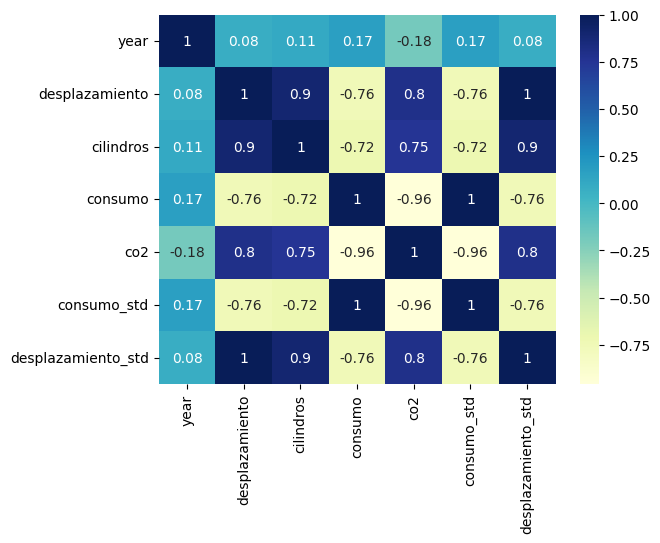

In [ ]:
import pandas as pd

import seaborn as sns

import matplotlib as plt

#Para la matriz de correlación
matriz_correlacion = data.corr().round(2)
matriz_correlacion #Imprimir la matriz de correlación con dos cifras después del cero

#Para el mapa de calor
sns.heatmap(data=matriz_correlacion, annot=True, cmap="YlGnBu") #El valor de cmap, se puede cambiar dependiendo de las necesidades


#Graficas de regresión lineal multiple
Utilizando sns seaborn para generar graficas multiples generamos la regresión lineal multiple, como se menciona antes se puede tener varias variables independientes pero solo una dependiente por lo cual utilizando co2 que es la variable que más relación tiene con cilindros y desplazamiento podemos predecir que las graficas obtendra un gran relación en los datos.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


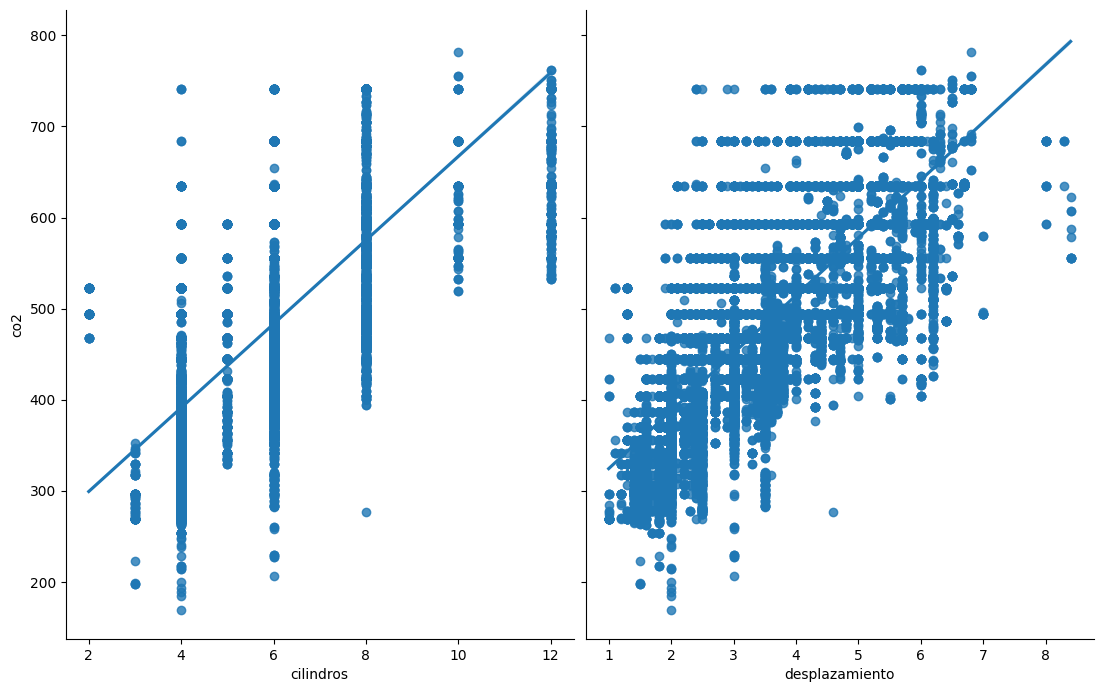

In [ ]:
sns.pairplot(data, x_vars=['cilindros','desplazamiento'], y_vars='co2', size=7, aspect=0.8,kind = 'reg')

#Conclusión
La regresión lineal nos dio como resultado que las variables CO2, DESPLAZAMIENTO Y CILINDROS, son las que nos ayudan a predecir el consumo de conbustible un motor, debido a que con estas variables podemos visualizar que son las que más información nos brindan de los datos.